In [ ]:
pip install transformers tensorflow scikit-learn googletrans

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 3.1 MB/s eta 0:00:00


In [ ]:
!pip install tensorflow --upgrade
!pip install transformers --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.3/615.3 MB 752.8 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 28.2 MB/s eta 0:00:00
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.17.1
    Uninstalling tensorboard-2.17.1:
      Successfully uninstalled tensorboard-2.17.1
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.17.1
    Uninstalling tensorflow-2.17.1:
      Successfully uninstalled tensorflow-2.17.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-keras 2.17.0 requires tensorflow<2.18,>=2.17, but you have tensorflow 2.18.0 which is incompatible.


**GRU MODEL** working fine

Unique values in 'Label' column before encoding: ['Non-Abusive' 'Abusive' 'abusive']
Unique values in 'Label' column after encoding: [ 0.  1. nan]
Invalid labels found:
                                                   Text  Label
1067  ஏம்மா லெட்சுமி ராமகிருஸ்ணன் உனக்கு தயாரிப்பாளர...    NaN
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


85/85 ━━━━━━━━━━━━━━━━━━━━ 30s 298ms/step - accuracy: 0.5054 - loss: 0.6920 - val_accuracy: 0.5737 - val_loss: 0.6534
Epoch 2/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 25s 291ms/step - accuracy: 0.8337 - loss: 0.4164 - val_accuracy: 0.7153 - val_loss: 0.6262
Epoch 3/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 23s 266ms/step - accuracy: 0.9648 - loss: 0.1168 - val_accuracy: 0.7035 - val_loss: 0.8797
Epoch 4/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 43s 286ms/step - accuracy: 0.9576 - loss: 547803.7500 - val_accuracy: 0.7035 - val_loss: 1.1695
Epoch 5/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 23s 267ms/step - accuracy: 0.9860 - loss: 0.1646 - val_accuracy: 0.6991 - val_loss: 0.9634
Epoch 6/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 43s 286ms/step - accuracy: 0.9929 - loss: 0.0248 - val_accuracy: 0.6932 - val_loss: 1.4969
Epoch 7/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 41s 285ms/step - accuracy: 0.9980 - loss: 0.0088 - val_accuracy: 0.7021 - val_loss: 1.3718
Epoch 8/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 41s 291ms/step - accuracy: 0.9989 - loss: 0.0108 - val_accuracy: 

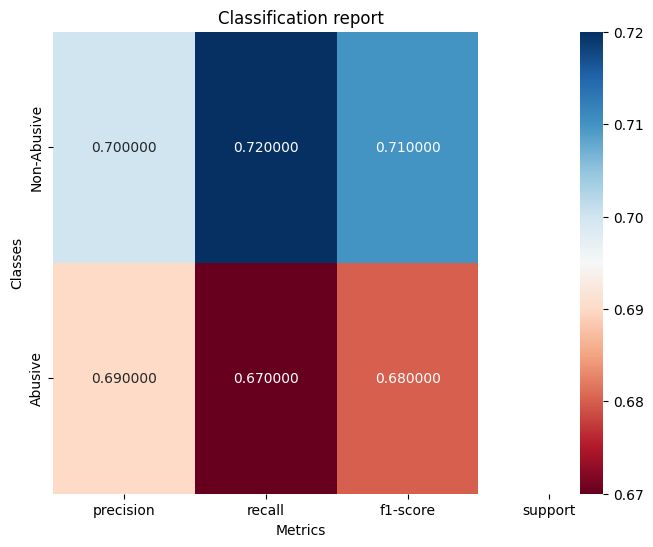

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step
Results saved to /content/AWT_results_GRU.csv


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense, Dropout
from tensorflow.keras.utils import to_categorical

# Load the training data from two CSV files
file_path_1 = '/content/AWT_train.csv'  # Path to first file
file_path_2 = '/content/AWT_dev.csv'  # Path to second file

df1 = pd.read_csv(file_path_1)
df2 = pd.read_csv(file_path_2)

# Combine the datasets
df = pd.concat([df1, df2], ignore_index=True)

# Ensure the column names are consistent
df.columns = ['Text', 'Label']  # Adjust if necessary

# Inspect the unique values in the 'Label' column before encoding
print(f"Unique values in 'Label' column before encoding: {df['Label'].unique()}")

# Map the labels to numeric values
df['Label'] = df['Label'].map({'Non-Abusive': 0, 'Abusive': 1})

# Ensure no invalid labels are present after mapping
print(f"Unique values in 'Label' column after encoding: {df['Label'].unique()}")

# Check for missing or invalid values in labels (NaN or any value other than 0 or 1)
invalid_labels = df[df['Label'].isna() | ~df['Label'].isin([0, 1])]
if not invalid_labels.empty:
    print("Invalid labels found:")
    print(invalid_labels)
else:
    print("No invalid labels found.")

# Clean the dataset by dropping rows with invalid or missing labels
df = df.dropna(subset=['Label'])
df = df[df['Label'].isin([0, 1])]

# Split the data into features (X) and target labels (y)
X = df['Text'].values
y = df['Label'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tokenize and pad sequences
max_words = 10000
max_len = 100

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

# Convert labels to categorical
y_train_cat = to_categorical(y_train, num_classes=2)
y_test_cat = to_categorical(y_test, num_classes=2)

# Build the GRU Model
model = Sequential()
model.add(Embedding(max_words, 128, input_length=max_len))
model.add(GRU(128, activation='relu', return_sequences=True))
model.add(Dropout(0.5))
model.add(GRU(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(2, activation='softmax'))  # Output layer with 2 classes

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train_pad, y_train_cat,
                    batch_size=32,
                    epochs=10,
                    validation_data=(X_test_pad, y_test_cat))

# Evaluate the model
y_pred = model.predict(X_test_pad)
y_pred_classes = np.argmax(y_pred, axis=1)

# Generate Classification Report
report = classification_report(y_test, y_pred_classes, target_names=['Non-Abusive', 'Abusive'])
print(report)

# Function to Visualize the Classification Report
def plot_classification_report(report, title='Classification report', cmap='RdBu'):
    lines = report.split('\n')

    classes = []
    plotMat = []
    for line in lines[2: (len(lines) - 3)]:
        t = line.split()
        if len(t) < 5:
            continue  # Skip lines that don't have the expected number of elements
        classes.append(t[0])
        v = [float(x) for x in t[1: len(t) - 1]]
        plotMat.append(v)

    plt.figure(figsize=(8, 6))
    sns.heatmap(plotMat, annot=True, fmt="f", cmap=cmap, xticklabels=['precision', 'recall', 'f1-score', 'support'], yticklabels=classes)
    plt.title(title)
    plt.xlabel('Metrics')
    plt.ylabel('Classes')
    plt.show()

plot_classification_report(report)

# Load the test data for prediction (without labels)
test_file_path = '/content/AWT_test_without_labels.csv'
test_df = pd.read_csv(test_file_path)

# Tokenize and pad sequences for test data
X_test_final_seq = tokenizer.texts_to_sequences(test_df['Text'].values)
X_test_final_pad = pad_sequences(X_test_final_seq, maxlen=max_len)

# Make predictions on the test data
y_test_final_pred = model.predict(X_test_final_pad)
y_test_final_pred_classes = np.argmax(y_test_final_pred, axis=1)

# Map predicted labels to original labels
label_map = {0: 'Non-Abusive', 1: 'Abusive'}
test_df['labels'] = y_test_final_pred_classes
test_df['labels'] = test_df['labels'].map(label_map)

# Save results to a CSV file
output_file_path = '/content/AWT_results_GRU.csv'
test_df.to_csv(output_file_path, index=False)

print(f'Results saved to {output_file_path}')


**LSTM MODEL** working fine

Unique values in 'Label' column before encoding: ['Non-Abusive' 'Abusive' 'abusive']
Unique values in 'Label' column after encoding: [ 0.  1. nan]
Invalid labels found:
                                                   Text  Label
1067  ஏம்மா லெட்சுமி ராமகிருஸ்ணன் உனக்கு தயாரிப்பாளர...    NaN
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


85/85 ━━━━━━━━━━━━━━━━━━━━ 30s 310ms/step - accuracy: 0.5133 - loss: 0.6909 - val_accuracy: 0.7168 - val_loss: 0.6197
Epoch 2/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 26s 307ms/step - accuracy: 0.8372 - loss: 0.4523 - val_accuracy: 0.7080 - val_loss: 0.5685
Epoch 3/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 40s 301ms/step - accuracy: 0.9364 - loss: 72353.1172 - val_accuracy: 0.6829 - val_loss: 0.6199
Epoch 4/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 41s 306ms/step - accuracy: 0.9321 - loss: 0.7147 - val_accuracy: 0.7124 - val_loss: 221051.0156
Epoch 5/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 26s 311ms/step - accuracy: 0.9642 - loss: 1.7200 - val_accuracy: 0.7080 - val_loss: 0.6076
Epoch 6/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 24s 284ms/step - accuracy: 0.9752 - loss: 39.6034 - val_accuracy: 0.6047 - val_loss: 0.9532
Epoch 7/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 43s 307ms/step - accuracy: 0.9208 - loss: 0.2697 - val_accuracy: 0.7168 - val_loss: 0.6491
Epoch 8/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 41s 307ms/step - accuracy: 0.9798 - loss: 0.1092 - val_accur

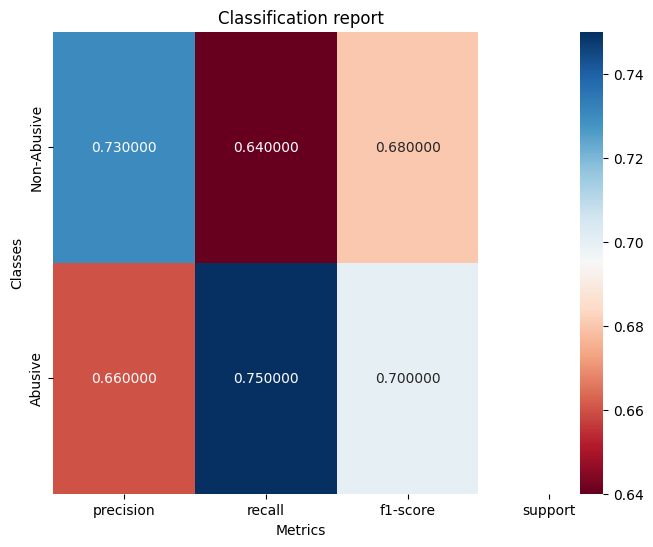

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step
Results saved to /content/AWT_results_LSTM.csv


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.utils import to_categorical

# Load the training data from two CSV files
file_path_1 = '/content/AWT_train.csv'  # Path to first file
file_path_2 = '/content/AWT_dev.csv'  # Path to second file

df1 = pd.read_csv(file_path_1)
df2 = pd.read_csv(file_path_2)

# Combine the datasets
df = pd.concat([df1, df2], ignore_index=True)

# Ensure the column names are consistent
df.columns = ['Text', 'Label']  # Adjust if necessary

# Inspect the unique values in the 'Label' column before encoding
print(f"Unique values in 'Label' column before encoding: {df['Label'].unique()}")

# Map the labels to numeric values
df['Label'] = df['Label'].map({'Non-Abusive': 0, 'Abusive': 1})

# Ensure no invalid labels are present after mapping
print(f"Unique values in 'Label' column after encoding: {df['Label'].unique()}")

# Check for missing or invalid values in labels (NaN or any value other than 0 or 1)
invalid_labels = df[df['Label'].isna() | ~df['Label'].isin([0, 1])]
if not invalid_labels.empty:
    print("Invalid labels found:")
    print(invalid_labels)
else:
    print("No invalid labels found.")

# Clean the dataset by dropping rows with invalid or missing labels
df = df.dropna(subset=['Label'])
df = df[df['Label'].isin([0, 1])]

# Split the data into features (X) and target labels (y)
X = df['Text'].values
y = df['Label'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tokenize and pad sequences
max_words = 10000
max_len = 100

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

# Convert labels to categorical
y_train_cat = to_categorical(y_train, num_classes=2)
y_test_cat = to_categorical(y_test, num_classes=2)

# Build the LSTM Model
model = Sequential()
model.add(Embedding(max_words, 128, input_length=max_len))
model.add(LSTM(128, activation='relu', return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(2, activation='softmax'))  # Output layer with 2 classes

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train_pad, y_train_cat,
                    batch_size=32,
                    epochs=10,
                    validation_data=(X_test_pad, y_test_cat))

# Evaluate the model
y_pred = model.predict(X_test_pad)
y_pred_classes = np.argmax(y_pred, axis=1)

# Generate Classification Report
report = classification_report(y_test, y_pred_classes, target_names=['Non-Abusive', 'Abusive'])
print(report)

# Function to Visualize the Classification Report
def plot_classification_report(report, title='Classification report', cmap='RdBu'):
    lines = report.split('\n')

    classes = []
    plotMat = []
    for line in lines[2: (len(lines) - 3)]:
        t = line.split()
        if len(t) < 5:
            continue  # Skip lines that don't have the expected number of elements
        classes.append(t[0])
        v = [float(x) for x in t[1: len(t) - 1]]
        plotMat.append(v)

    plt.figure(figsize=(8, 6))
    sns.heatmap(plotMat, annot=True, fmt="f", cmap=cmap, xticklabels=['precision', 'recall', 'f1-score', 'support'], yticklabels=classes)
    plt.title(title)
    plt.xlabel('Metrics')
    plt.ylabel('Classes')
    plt.show()

plot_classification_report(report)

# Load the test data for prediction (without labels)
test_file_path = '/content/AWT_test_without_labels.csv'
test_df = pd.read_csv(test_file_path)

# Tokenize and pad sequences for test data
X_test_final_seq = tokenizer.texts_to_sequences(test_df['Text'].values)
X_test_final_pad = pad_sequences(X_test_final_seq, maxlen=max_len)

# Make predictions on the test data
y_test_final_pred = model.predict(X_test_final_pad)
y_test_final_pred_classes = np.argmax(y_test_final_pred, axis=1)

# Map predicted labels to original labels
label_map = {0: 'Non-Abusive', 1: 'Abusive'}
test_df['labels'] = y_test_final_pred_classes
test_df['labels'] = test_df['labels'].map(label_map)

# Save results to a CSV file
output_file_path = '/content/AWT_results_LSTM.csv'
test_df.to_csv(output_file_path, index=False)

print(f'Results saved to {output_file_path}')


**Bidirectional LSTM MODEL** working fine

Unique values in 'Label' column before encoding: ['Non-Abusive' 'Abusive' 'abusive']
Unique values in 'Label' column after encoding: [ 0.  1. nan]
Invalid labels found:
                                                   Text  Label
1067  ஏம்மா லெட்சுமி ராமகிருஸ்ணன் உனக்கு தயாரிப்பாளர...    NaN
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


85/85 ━━━━━━━━━━━━━━━━━━━━ 70s 706ms/step - accuracy: 0.5326 - loss: 0.6912 - val_accuracy: 0.6962 - val_loss: 0.6238
Epoch 2/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 59s 692ms/step - accuracy: 0.6407 - loss: nan - val_accuracy: 0.5177 - val_loss: nan
Epoch 3/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 83s 700ms/step - accuracy: 0.5245 - loss: nan - val_accuracy: 0.5177 - val_loss: nan
Epoch 4/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 82s 702ms/step - accuracy: 0.5087 - loss: nan - val_accuracy: 0.5177 - val_loss: nan
Epoch 5/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 82s 702ms/step - accuracy: 0.5039 - loss: nan - val_accuracy: 0.5177 - val_loss: nan
Epoch 6/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 82s 699ms/step - accuracy: 0.5139 - loss: nan - val_accuracy: 0.5177 - val_loss: nan
Epoch 7/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 58s 689ms/step - accuracy: 0.5233 - loss: nan - val_accuracy: 0.5177 - val_loss: nan
Epoch 8/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 58s 688ms/step - accuracy: 0.5253 - loss: nan - val_accuracy: 0.5177 - val_loss: nan
Epoch 9/10
85/85 ━━━━

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


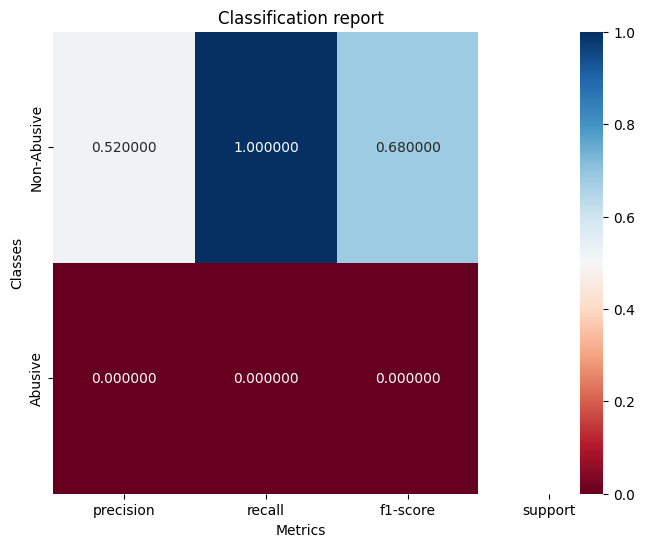

19/19 ━━━━━━━━━━━━━━━━━━━━ 5s 239ms/step
Results saved to /content/AWT_results_Bidirectional_LSTM.csv


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, Dense, Dropout
from tensorflow.keras.utils import to_categorical

# Load the training data from two CSV files
file_path_1 = '/content/AWT_train.csv'  # Path to first file
file_path_2 = '/content/AWT_dev.csv'  # Path to second file

df1 = pd.read_csv(file_path_1)
df2 = pd.read_csv(file_path_2)

# Combine the datasets
df = pd.concat([df1, df2], ignore_index=True)

# Ensure the column names are consistent
df.columns = ['Text', 'Label']  # Adjust if necessary

# Inspect the unique values in the 'Label' column before encoding
print(f"Unique values in 'Label' column before encoding: {df['Label'].unique()}")

# Map the labels to numeric values
df['Label'] = df['Label'].map({'Non-Abusive': 0, 'Abusive': 1})

# Ensure no invalid labels are present after mapping
print(f"Unique values in 'Label' column after encoding: {df['Label'].unique()}")

# Check for missing or invalid values in labels (NaN or any value other than 0 or 1)
invalid_labels = df[df['Label'].isna() | ~df['Label'].isin([0, 1])]
if not invalid_labels.empty:
    print("Invalid labels found:")
    print(invalid_labels)
else:
    print("No invalid labels found.")

# Clean the dataset by dropping rows with invalid or missing labels
df = df.dropna(subset=['Label'])
df = df[df['Label'].isin([0, 1])]

# Split the data into features (X) and target labels (y)
X = df['Text'].values
y = df['Label'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tokenize and pad sequences
max_words = 10000
max_len = 100

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

# Convert labels to categorical
y_train_cat = to_categorical(y_train, num_classes=2)
y_test_cat = to_categorical(y_test, num_classes=2)

# Build the Bidirectional LSTM Model
model = Sequential()
model.add(Embedding(max_words, 128, input_length=max_len))
model.add(Bidirectional(LSTM(128, activation='relu', return_sequences=True)))
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(64, activation='relu')))
model.add(Dense(32, activation='relu'))
model.add(Dense(2, activation='softmax'))  # Output layer with 2 classes

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train_pad, y_train_cat,
                    batch_size=32,
                    epochs=10,
                    validation_data=(X_test_pad, y_test_cat))

# Evaluate the model
y_pred = model.predict(X_test_pad)
y_pred_classes = np.argmax(y_pred, axis=1)

# Generate Classification Report
report = classification_report(y_test, y_pred_classes, target_names=['Non-Abusive', 'Abusive'])
print(report)

# Function to Visualize the Classification Report
def plot_classification_report(report, title='Classification report', cmap='RdBu'):
    lines = report.split('\n')

    classes = []
    plotMat = []
    for line in lines[2: (len(lines) - 3)]:
        t = line.split()
        if len(t) < 5:
            continue  # Skip lines that don't have the expected number of elements
        classes.append(t[0])
        v = [float(x) for x in t[1: len(t) - 1]]
        plotMat.append(v)

    plt.figure(figsize=(8, 6))
    sns.heatmap(plotMat, annot=True, fmt="f", cmap=cmap, xticklabels=['precision', 'recall', 'f1-score', 'support'], yticklabels=classes)
    plt.title(title)
    plt.xlabel('Metrics')
    plt.ylabel('Classes')
    plt.show()

plot_classification_report(report)

# Load the test data for prediction (without labels)
test_file_path = '/content/AWT_test_without_labels.csv'
test_df = pd.read_csv(test_file_path)

# Tokenize and pad sequences for test data
X_test_final_seq = tokenizer.texts_to_sequences(test_df['Text'].values)
X_test_final_pad = pad_sequences(X_test_final_seq, maxlen=max_len)

# Make predictions on the test data
y_test_final_pred = model.predict(X_test_final_pad)
y_test_final_pred_classes = np.argmax(y_test_final_pred, axis=1)

# Map predicted labels to original labels
label_map = {0: 'Non-Abusive', 1: 'Abusive'}
test_df['labels'] = y_test_final_pred_classes
test_df['labels'] = test_df['labels'].map(label_map)

# Save results to a CSV file
output_file_path = '/content/AWT_results_Bidirectional_LSTM.csv'
test_df.to_csv(output_file_path, index=False)

print(f'Results saved to {output_file_path}')


**CNN MODEL**

Unique values in 'Label' column before encoding: ['Abusive' 'Non-Abusive' 'abusive']
Unique values in 'Label' column after encoding: [ 1.  0. nan]
Invalid labels found:
                                                   Text  Label
1665  ஏம்மா லெட்சுமி ராமகிருஸ்ணன் உனக்கு தயாரிப்பாளர...    NaN
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


85/85 ━━━━━━━━━━━━━━━━━━━━ 8s 68ms/step - accuracy: 0.5079 - loss: 0.6942 - val_accuracy: 0.5251 - val_loss: 0.6819
Epoch 2/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 10s 65ms/step - accuracy: 0.7210 - loss: 0.5620 - val_accuracy: 0.7655 - val_loss: 0.5122
Epoch 3/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 11s 79ms/step - accuracy: 0.9631 - loss: 0.1454 - val_accuracy: 0.7611 - val_loss: 0.6272
Epoch 4/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 6s 65ms/step - accuracy: 0.9939 - loss: 0.0300 - val_accuracy: 0.7448 - val_loss: 0.8085
Epoch 5/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 7s 81ms/step - accuracy: 0.9995 - loss: 0.0091 - val_accuracy: 0.7448 - val_loss: 0.9090
Epoch 6/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 9s 71ms/step - accuracy: 0.9999 - loss: 0.0036 - val_accuracy: 0.7375 - val_loss: 0.9763
Epoch 7/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 10s 66ms/step - accuracy: 0.9994 - loss: 0.0039 - val_accuracy: 0.7375 - val_loss: 1.0374
Epoch 8/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 7s 81ms/step - accuracy: 0.9995 - loss: 0.0034 - val_accuracy: 0.7404 - val_loss:

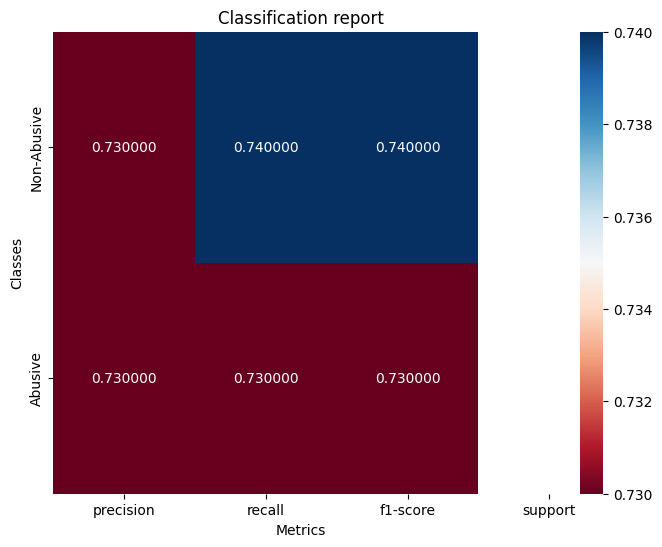

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Results saved to /content/AWT_results_CNN.csv


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

# Load the training data from two CSV files
file_path_1 = '/content/sample_data/AWT_dev.csv'  # Path to first file
file_path_2 = '/content/sample_data/AWT_train.csv'  # Path to second file

df1 = pd.read_csv(file_path_1)
df2 = pd.read_csv(file_path_2)

# Combine the datasets
df = pd.concat([df1, df2], ignore_index=True)

# Ensure the column names are consistent
df.columns = ['Text', 'Label']  # Adjust if necessary

# Inspect the unique values in the 'Label' column before encoding
print(f"Unique values in 'Label' column before encoding: {df['Label'].unique()}")

# Map the labels to numeric values
df['Label'] = df['Label'].map({'Non-Abusive': 0, 'Abusive': 1})

# Ensure no invalid labels are present after mapping
print(f"Unique values in 'Label' column after encoding: {df['Label'].unique()}")

# Check for missing or invalid values in labels (NaN or any value other than 0 or 1)
invalid_labels = df[df['Label'].isna() | ~df['Label'].isin([0, 1])]
if not invalid_labels.empty:
    print("Invalid labels found:")
    print(invalid_labels)
else:
    print("No invalid labels found.")

# Clean the dataset by dropping rows with invalid or missing labels
df = df.dropna(subset=['Label'])
df = df[df['Label'].isin([0, 1])]

# Split the data into features (X) and target labels (y)
X = df['Text'].values
y = df['Label'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tokenize and pad sequences
max_words = 10000
max_len = 100

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

# Convert labels to categorical
y_train_cat = to_categorical(y_train, num_classes=2)
y_test_cat = to_categorical(y_test, num_classes=2)

# Build the CNN Model
model = Sequential()
model.add(Embedding(max_words, 128, input_length=max_len))
model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
model.add(MaxPooling1D(pool_size=4))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(2, activation='softmax'))  # Output layer with 2 classes

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train_pad, y_train_cat,
                    batch_size=32,
                    epochs=10,
                    validation_data=(X_test_pad, y_test_cat))

# Evaluate the model
y_pred = model.predict(X_test_pad)
y_pred_classes = np.argmax(y_pred, axis=1)

# Generate Classification Report
report = classification_report(y_test, y_pred_classes, target_names=['Non-Abusive', 'Abusive'])
print(report)

# Function to Visualize the Classification Report
def plot_classification_report(report, title='Classification report', cmap='RdBu'):
    lines = report.split('\n')

    classes = []
    plotMat = []
    for line in lines[2: (len(lines) - 3)]:
        t = line.split()
        if len(t) < 5:
            continue  # Skip lines that don't have the expected number of elements
        classes.append(t[0])
        v = [float(x) for x in t[1: len(t) - 1]]
        plotMat.append(v)

    plt.figure(figsize=(8, 6))
    sns.heatmap(plotMat, annot=True, fmt="f", cmap=cmap, xticklabels=['precision', 'recall', 'f1-score', 'support'], yticklabels=classes)
    plt.title(title)
    plt.xlabel('Metrics')
    plt.ylabel('Classes')
    plt.show()

plot_classification_report(report)

# Load the test data for prediction (without labels)
test_file_path = '/content/sample_data/AWT_test_without_labels.csv'
test_df = pd.read_csv(test_file_path)

# Tokenize and pad sequences for test data
X_test_final_seq = tokenizer.texts_to_sequences(test_df['Text'].values)
X_test_final_pad = pad_sequences(X_test_final_seq, maxlen=max_len)

# Make predictions on the test data
y_test_final_pred = model.predict(X_test_final_pad)
y_test_final_pred_classes = np.argmax(y_test_final_pred, axis=1)

# Map predicted labels to original labels
label_map = {0: 'Non-Abusive', 1: 'Abusive'}
test_df['labels'] = y_test_final_pred_classes
test_df['labels'] = test_df['labels'].map(label_map)

# Save results to a CSV file
output_file_path = '/content/AWT_results_CNN.csv'
test_df.to_csv(output_file_path, index=False)

print(f'Results saved to {output_file_path}')


**FastText Model**

Unique values in 'Label' column before encoding: ['Non-Abusive' 'Abusive' 'abusive']
Unique values in 'Label' column after encoding: [ 0.  1. nan]
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


85/85 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - accuracy: 0.4869 - loss: 0.6966 - val_accuracy: 0.5162 - val_loss: 0.6933
Epoch 2/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.5426 - loss: 0.6891 - val_accuracy: 0.4823 - val_loss: 0.6923
Epoch 3/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.5592 - loss: 0.6881 - val_accuracy: 0.5251 - val_loss: 0.6873
Epoch 4/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.5602 - loss: 0.6844 - val_accuracy: 0.6593 - val_loss: 0.6843
Epoch 5/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.5603 - loss: 0.6821 - val_accuracy: 0.5826 - val_loss: 0.6752
Epoch 6/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.6162 - loss: 0.6670 - val_accuracy: 0.5619 - val_loss: 0.6616
Epoch 7/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.6505 - loss: 0.6332 - val_accuracy: 0.7271 - val_loss: 0.6283
Epoch 8/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.7001 - loss: 0.5905 - val_accuracy: 0.6121 - val_loss: 0.

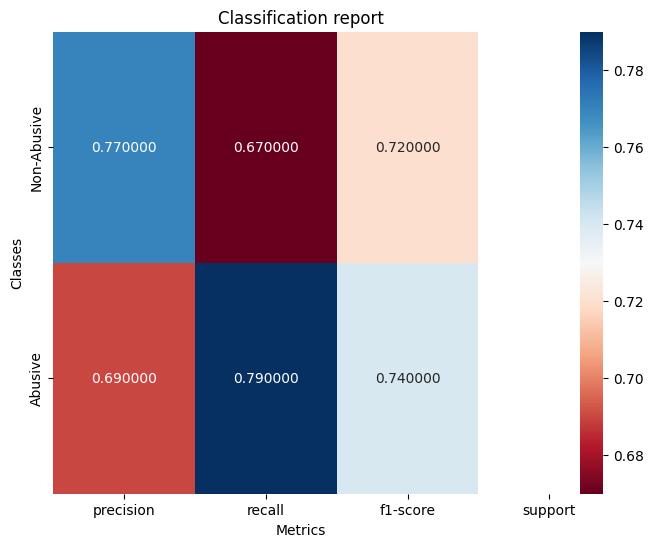

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Results saved to /content/sample_data/AWT_results_FastText.csv


In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

# Load the training data from two CSV files
file_path_1 = '/content/sample_data/AWT_train.csv'  # Path to first file
file_path_2 = '/content/sample_data/AWT_dev.csv'  # Path to second file

df1 = pd.read_csv(file_path_1)
df2 = pd.read_csv(file_path_2)

# Combine the datasets
df = pd.concat([df1, df2], ignore_index=True)

# Ensure the column names are consistent
df.columns = ['Text', 'Label']  # Adjust if necessary

# Inspect the unique values in the 'Label' column before encoding
print(f"Unique values in 'Label' column before encoding: {df['Label'].unique()}")

# Map the labels to numeric values
df['Label'] = df['Label'].map({'Non-Abusive': 0, 'Abusive': 1})

# Ensure no invalid labels are present after mapping
print(f"Unique values in 'Label' column after encoding: {df['Label'].unique()}")

# Clean the dataset by dropping rows with invalid or missing labels
df = df.dropna(subset=['Label'])
df = df[df['Label'].isin([0, 1])]

# Split the data into features (X) and target labels (y)
X = df['Text'].values
y = df['Label'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tokenize and pad sequences
max_words = 10000
max_len = 100

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

# Convert labels to categorical
y_train_cat = to_categorical(y_train, num_classes=2)
y_test_cat = to_categorical(y_test, num_classes=2)

# Build the FastText Model
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_len))
model.add(GlobalAveragePooling1D())  # FastText uses global average pooling
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dense(2, activation='softmax'))  # Output layer with 2 classes

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train_pad, y_train_cat,
                    batch_size=32,
                    epochs=10,
                    validation_data=(X_test_pad, y_test_cat))

# Evaluate the model
y_pred = model.predict(X_test_pad)
y_pred_classes = np.argmax(y_pred, axis=1)

# Generate Classification Report
report = classification_report(y_test, y_pred_classes, target_names=['Non-Abusive', 'Abusive'])
print(report)

# Function to Visualize the Classification Report
def plot_classification_report(report, title='Classification report', cmap='RdBu'):
    lines = report.split('\n')

    classes = []
    plotMat = []
    for line in lines[2: (len(lines) - 3)]:
        t = line.split()
        if len(t) < 5:
            continue  # Skip lines that don't have the expected number of elements
        classes.append(t[0])
        v = [float(x) for x in t[1: len(t) - 1]]
        plotMat.append(v)

    plt.figure(figsize=(8, 6))
    sns.heatmap(plotMat, annot=True, fmt="f", cmap=cmap, xticklabels=['precision', 'recall', 'f1-score', 'support'], yticklabels=classes)
    plt.title(title)
    plt.xlabel('Metrics')
    plt.ylabel('Classes')
    plt.show()

plot_classification_report(report)

# Load the test data for prediction (without labels)
test_file_path = '/content/sample_data/AWT_test_without_labels.csv'
test_df = pd.read_csv(test_file_path)

# Tokenize and pad sequences for test data
X_test_final_seq = tokenizer.texts_to_sequences(test_df['Text'].values)
X_test_final_pad = pad_sequences(X_test_final_seq, maxlen=max_len)

# Make predictions on the test data
y_test_final_pred = model.predict(X_test_final_pad)
y_test_final_pred_classes = np.argmax(y_test_final_pred, axis=1)

# Map predicted labels to original labels
label_map = {0: 'Non-Abusive', 1: 'Abusive'}
test_df['labels'] = y_test_final_pred_classes
test_df['labels'] = test_df['labels'].map(label_map)

# Save results to a CSV file
output_file_path = '/content/sample_data/AWT_results_FastText.csv'
test_df.to_csv(output_file_path, index=False)

print(f'Results saved to {output_file_path}')


**XGBoost Model**

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
import xgboost as xgb

# Load the training data from two CSV files
file_path_1 = '/content/sample_data/AWT_train.csv'  # Path to first file
file_path_2 = '/content/sample_data/AWT_dev.csv'  # Path to second file

df1 = pd.read_csv(file_path_1)
df2 = pd.read_csv(file_path_2)

# Combine the datasets
df = pd.concat([df1, df2], ignore_index=True)

# Ensure the column names are consistent
df.columns = ['Text', 'Label']  # Adjust if necessary

# Normalize label values (convert to lowercase for consistency)
df['Label'] = df['Label'].str.lower()

# Inspect unique values in the 'Label' column before encoding
print(f"Unique values in 'Label' column before encoding: {df['Label'].unique()}")

# Map labels to numeric values
label_mapping = {'non-abusive': 0, 'abusive': 1}
df['Label'] = df['Label'].map(label_mapping)

# Drop rows with missing or invalid labels
df = df.dropna(subset=['Label'])
df = df[df['Label'].isin([0, 1])]

# Split the data into features (X) and target labels (y)
X = df['Text'].values
y = df['Label'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize text data using TF-IDF
tfidf = TfidfVectorizer(max_features=10000, ngram_range=(1, 2))
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Encode labels using LabelEncoder
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Ensure label consistency
print("Classes in Label Encoder:", label_encoder.classes_)

# Train XGBoost Model
xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',
    max_depth=6,
    n_estimators=100,
    learning_rate=0.1,
    eval_metric='logloss'  # Remove 'use_label_encoder'
)

xgb_model.fit(X_train_tfidf, y_train_encoded)

# Make predictions
y_pred = xgb_model.predict(X_test_tfidf)

# Generate classification report
target_names = ['Non-Abusive', 'Abusive']  # Explicit target names
report = classification_report(y_test_encoded, y_pred, target_names=target_names)
print(report)

# Evaluate accuracy
accuracy = accuracy_score(y_test_encoded, y_pred)
print(f"Test Accuracy: {accuracy}")

# Load the test data for prediction (without labels)
test_file_path = '/content/sample_data/AWT_test_without_labels.csv'
test_df = pd.read_csv(test_file_path)

# Tokenize and vectorize test data
X_test_final_tfidf = tfidf.transform(test_df['Text'].values)

# Make predictions on the test data
y_test_final_pred = xgb_model.predict(X_test_final_tfidf)

# Map predicted labels to original labels
label_map = {0: 'Non-Abusive', 1: 'Abusive'}
test_df['Label'] = [label_map[label] for label in y_test_final_pred]

# Save results to a CSV file
output_file_path = '/content/sample_data/AWT_results_XGBoost.csv'
test_df.to_csv(output_file_path, index=False)

print(f'Results saved to {output_file_path}')


Unique values in 'Label' column before encoding: ['non-abusive' 'abusive']
Classes in Label Encoder: [0 1]
              precision    recall  f1-score   support

 Non-Abusive       0.65      0.75      0.70       342
     Abusive       0.70      0.59      0.64       336

    accuracy                           0.67       678
   macro avg       0.68      0.67      0.67       678
weighted avg       0.68      0.67      0.67       678

Test Accuracy: 0.672566371681416
Results saved to /content/sample_data/AWT_results_XGBoost.csv
